In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout, ZeroPadding2D, Dropout, BatchNormalization

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import h5py

In [4]:
# show what is inside
with h5py.File('quickdraw_train.h5', 'r') as h5_data:
    for c_key in h5_data.keys():
        print(c_key, h5_data[c_key].shape, h5_data[c_key].dtype)

countrycode (254517,) |S2
key_id (254517,) int64
recognized (254517,) bool
strokes (254517, 108, 3) uint8
thumbnail (254517, 128, 128, 1) float32
timestamp (254517,) |S26
word (254517,) |S23


In [5]:
with h5py.File('quickdraw_train.h5', 'r') as h5_data:
    X_train = h5_data['thumbnail'].value
    Y_train = h5_data['word'].value

/Users/shloakgupta/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [6]:
with h5py.File('quickdraw_valid.h5', 'r') as h5_data:
    X_valid = h5_data['thumbnail'].value
    Y_valid = h5_data['word'].value

In [7]:
#X_train = np.squeeze(X_train)

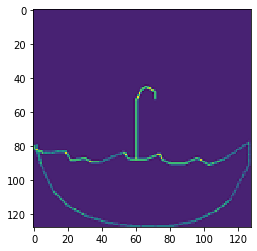

In [8]:
plt.imshow(np.squeeze(X_train[0]))

### normalizing values between 0 and 1

In [9]:
X_train = X_train/(X_train.max())
X_valid = X_valid/(X_valid.max())

### finding all uniqe categories

In [10]:
unique_list = [] 
      
    # traverse for all elements 
for x in Y_train: 
        # check if exists in unique_list or not 
    if x not in unique_list: 
        unique_list.append(x) 
    # print list 
print(len(unique_list))
# for x in unique_list: 
#     print (x)


345


In [10]:
ytrain = []
for x in Y_train: 
    for y in unique_list: 
        if x == y: 
            ytrain.append(unique_list.index(y))
ytrain = np.array(ytrain)

In [11]:
y_valid = []
for x in Y_valid: 
    for y in unique_list: 
        if x == y: 
            y_valid.append(unique_list.index(y))
y_valid = np.array(y_valid)

## Convolution Neural Network Model

In [12]:
model = Sequential()

In [13]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_uniform', input_shape = (128, 128, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units = 345, activation  = 'softmax'))

In [14]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])

In [15]:
history = model.fit(X_train, ytrain, epochs = 5, batch_size = 16, verbose = 1, validation_data = (X_valid, y_valid))

Train on 254517 samples, validate on 125275 samples
Epoch 1/5
254517/254517 [==============================] - 9670s 38ms/sample - loss: 3.7759 - sparse_categorical_accuracy: 0.2142 - val_loss: 2.7581 - val_sparse_categorical_accuracy: 0.3945
Epoch 2/5
254517/254517 [==============================] - 9926s 39ms/sample - loss: 3.0064 - sparse_categorical_accuracy: 0.3268 - val_loss: 3.1118 - val_sparse_categorical_accuracy: 0.3162
Epoch 3/5
254517/254517 [==============================] - 42934s 169ms/sample - loss: 2.7592 - sparse_categorical_accuracy: 0.3693 - val_loss: 2.4157 - val_sparse_categorical_accuracy: 0.4508
Epoch 4/5
254517/254517 [==============================] - 9970s 39ms/sample - loss: 2.5704 - sparse_categorical_accuracy: 0.4009 - val_loss: 2.4142 - val_sparse_categorical_accuracy: 0.4618
Epoch 5/5
254517/254517 [==============================] - 9994s 39ms/sample - loss: 2.4140 - sparse_categorical_accuracy: 0.4285 - val_loss: 2.4252 - val_sparse_categorical_accuracy

In [16]:
tf.keras.models.save_model(model, 'modelv1.h5')

## Checking for Overfitting

In [19]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
  plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper right')
  plt.show()

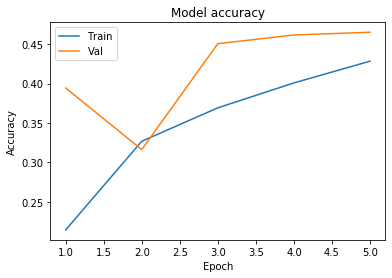

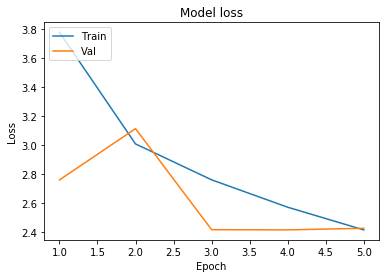

In [20]:
plot_learningCurve(history, 5)

## Loading saved Model

In [12]:
from tensorflow.keras.models import load_model
model = load_model('modelv1.h5')

In [13]:
with h5py.File('quickdraw_test.h5', 'r') as h5_data:
    X_test = h5_data['thumbnail'].value
    Y_test = h5_data['word'].value

In [14]:
prediction = model.predict(X_test)

Actual = b'pear'
Predicted = b'pear'


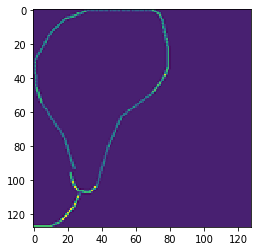

In [15]:
print('Actual = ' + str(Y_test[1]))
print('Predicted = ' + str(unique_list[np.argmax(prediction[1])]))
plt.imshow(np.squeeze(X_test[1]))

Actual = b'paint can'
Predicted = b'bucket'


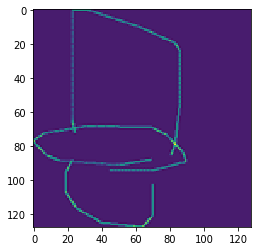

In [16]:
print('Actual = ' + str(Y_test[26]))
print('Predicted = ' + str(unique_list[np.argmax(prediction[26])]))
plt.imshow(np.squeeze(X_test[26]))

In [18]:
predicted = []
for i in range(len(prediction)):
    predicted.append(unique_list[np.argmax(prediction[i])])

## Finding missclassified categories

In [24]:
missclass = {}
for x in range(len(unique_list)):
    print('\n')
    print(unique_list[x])
    print('\n')
    missclass[unique_list[x]] = []
    for i in range(len(predicted)):
        if Y_test[i] != predicted[i] and unique_list[x] == Y_test[i]:
            #print(Y_test[i])
            missclass[unique_list[x]].append(predicted[i])
            print('Predicted as = '+ str(predicted[i]))
    



b'umbrella'


Predicted as = b'barn'
Predicted as = b'see saw'
Predicted as = b'mailbox'
Predicted as = b'rain'
Predicted as = b'hammer'
Predicted as = b'mailbox'
Predicted as = b'swing set'
Predicted as = b'mushroom'
Predicted as = b'microphone'
Predicted as = b'mushroom'
Predicted as = b'mailbox'
Predicted as = b'paintbrush'
Predicted as = b'hammer'
Predicted as = b'hammer'
Predicted as = b'mushroom'
Predicted as = b'lollipop'
Predicted as = b'mailbox'
Predicted as = b'broccoli'
Predicted as = b'jail'
Predicted as = b'microphone'
Predicted as = b'mailbox'
Predicted as = b'helmet'
Predicted as = b'hammer'
Predicted as = b'axe'
Predicted as = b'popsicle'
Predicted as = b'barn'
Predicted as = b'knee'
Predicted as = b'broccoli'
Predicted as = b'mermaid'
Predicted as = b'basketball'
Predicted as = b'octopus'
Predicted as = b'eye'
Predicted as = b'microphone'
Predicted as = b'popsicle'
Predicted as = b'stop sign'
Predicted as = b'mushroom'
Predicted as = b'barn'
Predicted as = b'parachut

Predicted as = b'cup'
Predicted as = b'birthday cake'


b'couch'


Predicted as = b'stereo'
Predicted as = b'keyboard'
Predicted as = b'table'
Predicted as = b'piano'
Predicted as = b'piano'
Predicted as = b'binoculars'
Predicted as = b'toothbrush'
Predicted as = b'table'
Predicted as = b'piano'
Predicted as = b'dumbbell'
Predicted as = b'barn'
Predicted as = b'saw'
Predicted as = b'piano'
Predicted as = b'motorbike'
Predicted as = b'dumbbell'
Predicted as = b'barn'
Predicted as = b'backpack'
Predicted as = b'firetruck'
Predicted as = b'toilet'
Predicted as = b'train'
Predicted as = b'table'
Predicted as = b'basket'
Predicted as = b'bee'
Predicted as = b'sandwich'
Predicted as = b'hospital'
Predicted as = b'bed'
Predicted as = b'tractor'
Predicted as = b'barn'
Predicted as = b'dog'
Predicted as = b'bridge'
Predicted as = b'bucket'
Predicted as = b'keyboard'
Predicted as = b'cow'
Predicted as = b'binoculars'
Predicted as = b'bus'
Predicted as = b'table'
Predicted as = b'bench'
Predicted

Predicted as = b'whale'
Predicted as = b'hat'
Predicted as = b'crocodile'
Predicted as = b'bed'
Predicted as = b'raccoon'
Predicted as = b'bathtub'
Predicted as = b'hot dog'
Predicted as = b'chandelier'
Predicted as = b'keyboard'
Predicted as = b'bed'
Predicted as = b'The Great Wall of China'
Predicted as = b'sandwich'
Predicted as = b'bathtub'
Predicted as = b'hot dog'
Predicted as = b'toothbrush'
Predicted as = b'stereo'
Predicted as = b'bulldozer'
Predicted as = b'clock'
Predicted as = b'bed'
Predicted as = b'ant'
Predicted as = b'dragon'
Predicted as = b'belt'
Predicted as = b'campfire'
Predicted as = b'trombone'
Predicted as = b'train'
Predicted as = b'line'
Predicted as = b'bed'
Predicted as = b'camouflage'
Predicted as = b'airplane'
Predicted as = b'speedboat'
Predicted as = b'cow'
Predicted as = b'campfire'
Predicted as = b'mermaid'
Predicted as = b'cruise ship'
Predicted as = b'cruise ship'
Predicted as = b'speedboat'
Predicted as = b'school bus'
Predicted as = b'train'
Predic

Predicted as = b'radio'
Predicted as = b'sleeping bag'
Predicted as = b'remote control'
Predicted as = b'cell phone'
Predicted as = b'cow'
Predicted as = b'cell phone'
Predicted as = b'cell phone'
Predicted as = b'sock'
Predicted as = b'cell phone'
Predicted as = b'barn'
Predicted as = b'donut'
Predicted as = b'face'
Predicted as = b'flip flops'
Predicted as = b'barn'
Predicted as = b'crayon'
Predicted as = b'rainbow'
Predicted as = b'remote control'
Predicted as = b'paper clip'
Predicted as = b'penguin'
Predicted as = b'bulldozer'
Predicted as = b'goatee'
Predicted as = b'peanut'
Predicted as = b'cell phone'
Predicted as = b'cell phone'
Predicted as = b'fireplace'
Predicted as = b'kangaroo'
Predicted as = b'paper clip'
Predicted as = b'cooler'
Predicted as = b'sock'
Predicted as = b'bulldozer'
Predicted as = b'castle'
Predicted as = b'bracelet'
Predicted as = b'pants'
Predicted as = b'lion'
Predicted as = b'cell phone'
Predicted as = b'shovel'
Predicted as = b'banana'
Predicted as = b

Predicted as = b'mushroom'
Predicted as = b'diamond'
Predicted as = b'blackberry'
Predicted as = b'tennis racquet'
Predicted as = b'matches'
Predicted as = b'matches'
Predicted as = b'mailbox'
Predicted as = b'spoon'
Predicted as = b'axe'
Predicted as = b'pencil'
Predicted as = b'microphone'
Predicted as = b'lollipop'
Predicted as = b'bottlecap'
Predicted as = b'screwdriver'
Predicted as = b'microphone'
Predicted as = b'lollipop'
Predicted as = b'bear'
Predicted as = b'finger'
Predicted as = b'beard'
Predicted as = b'castle'
Predicted as = b'carrot'
Predicted as = b'syringe'
Predicted as = b'chair'
Predicted as = b'matches'
Predicted as = b'chair'
Predicted as = b'mailbox'


b'tiger'


Predicted as = b'cow'
Predicted as = b'zebra'
Predicted as = b'ant'
Predicted as = b'cow'
Predicted as = b'raccoon'
Predicted as = b'fence'
Predicted as = b'sheep'
Predicted as = b'cow'
Predicted as = b'bee'
Predicted as = b'zebra'
Predicted as = b'zebra'
Predicted as = b'zebra'
Predicted as = b'zebra'
P

Predicted as = b'book'
Predicted as = b'oven'
Predicted as = b'postcard'
Predicted as = b'jail'
Predicted as = b'postcard'
Predicted as = b'oven'
Predicted as = b'ambulance'
Predicted as = b'postcard'
Predicted as = b'stereo'
Predicted as = b'book'
Predicted as = b'passport'
Predicted as = b'couch'
Predicted as = b'jail'
Predicted as = b'picture frame'
Predicted as = b'table'
Predicted as = b'radio'
Predicted as = b'postcard'
Predicted as = b'postcard'
Predicted as = b'couch'
Predicted as = b'oven'
Predicted as = b'jail'
Predicted as = b'picture frame'
Predicted as = b'bathtub'
Predicted as = b'chandelier'
Predicted as = b'couch'
Predicted as = b'postcard'
Predicted as = b'keyboard'
Predicted as = b'book'
Predicted as = b'truck'
Predicted as = b'calendar'
Predicted as = b'ambulance'
Predicted as = b'basket'
Predicted as = b'jail'
Predicted as = b'couch'
Predicted as = b'jail'
Predicted as = b'table'
Predicted as = b'mug'
Predicted as = b'bed'
Predicted as = b'shorts'
Predicted as = b'c

Predicted as = b'dumbbell'
Predicted as = b'toothbrush'
Predicted as = b'tiger'
Predicted as = b'fence'
Predicted as = b'tennis racquet'
Predicted as = b'tiger'
Predicted as = b'hedgehog'
Predicted as = b'stove'
Predicted as = b'camel'
Predicted as = b'camouflage'
Predicted as = b'firetruck'
Predicted as = b'tiger'
Predicted as = b'The Great Wall of China'
Predicted as = b'fence'
Predicted as = b'zebra'
Predicted as = b'grass'
Predicted as = b'campfire'
Predicted as = b'tiger'
Predicted as = b'toothbrush'
Predicted as = b'bridge'
Predicted as = b'chandelier'
Predicted as = b'kangaroo'
Predicted as = b'animal migration'
Predicted as = b'school bus'
Predicted as = b'piano'
Predicted as = b'mosquito'
Predicted as = b'toothbrush'
Predicted as = b'camel'
Predicted as = b'fence'
Predicted as = b'tiger'
Predicted as = b'school bus'
Predicted as = b'tiger'
Predicted as = b'zebra'
Predicted as = b'grass'
Predicted as = b'cow'
Predicted as = b'grapes'
Predicted as = b'camouflage'
Predicted as = 

Predicted as = b'owl'
Predicted as = b'sock'
Predicted as = b'soccer ball'
Predicted as = b'The Mona Lisa'
Predicted as = b'strawberry'
Predicted as = b'backpack'
Predicted as = b'dumbbell'
Predicted as = b'pig'
Predicted as = b'raccoon'
Predicted as = b'leaf'
Predicted as = b'cookie'
Predicted as = b'mermaid'
Predicted as = b'blueberry'
Predicted as = b'bracelet'
Predicted as = b'pineapple'
Predicted as = b'panda'
Predicted as = b'grapes'
Predicted as = b'squirrel'
Predicted as = b'dog'
Predicted as = b'cannon'
Predicted as = b'tiger'
Predicted as = b'monkey'
Predicted as = b'tiger'
Predicted as = b'cat'
Predicted as = b'owl'
Predicted as = b'monkey'
Predicted as = b'crab'
Predicted as = b'apple'
Predicted as = b'panda'
Predicted as = b'pineapple'
Predicted as = b'panda'
Predicted as = b'face'
Predicted as = b'dog'
Predicted as = b'crab'
Predicted as = b'crab'
Predicted as = b'owl'
Predicted as = b'vase'
Predicted as = b'campfire'
Predicted as = b'tiger'
Predicted as = b'monkey'
Predi

Predicted as = b'hockey stick'
Predicted as = b'violin'
Predicted as = b'paintbrush'
Predicted as = b'string bean'
Predicted as = b'shovel'
Predicted as = b'see saw'
Predicted as = b'matches'
Predicted as = b'feather'
Predicted as = b'baseball bat'
Predicted as = b'arm'
Predicted as = b'matches'
Predicted as = b'violin'
Predicted as = b'bicycle'
Predicted as = b'finger'
Predicted as = b'paintbrush'
Predicted as = b'matches'
Predicted as = b'shovel'
Predicted as = b'baseball bat'
Predicted as = b'lollipop'
Predicted as = b'matches'
Predicted as = b'lollipop'
Predicted as = b'clarinet'
Predicted as = b'rifle'
Predicted as = b'baseball bat'
Predicted as = b'baseball bat'
Predicted as = b'clarinet'
Predicted as = b'popsicle'
Predicted as = b'microphone'
Predicted as = b'asparagus'
Predicted as = b'shovel'
Predicted as = b'microphone'
Predicted as = b'mailbox'
Predicted as = b'microphone'
Predicted as = b'waterslide'
Predicted as = b'lollipop'
Predicted as = b'garden hose'
Predicted as = b'

Predicted as = b'table'
Predicted as = b'finger'
Predicted as = b'paintbrush'
Predicted as = b'string bean'
Predicted as = b'waterslide'
Predicted as = b'harp'
Predicted as = b'microphone'
Predicted as = b'feather'
Predicted as = b'feather'
Predicted as = b'crayon'
Predicted as = b'nail'
Predicted as = b'paintbrush'
Predicted as = b'paintbrush'
Predicted as = b'candle'
Predicted as = b'river'
Predicted as = b'feather'
Predicted as = b'crayon'
Predicted as = b'crayon'
Predicted as = b'toothbrush'
Predicted as = b'belt'
Predicted as = b'feather'
Predicted as = b'skateboard'
Predicted as = b'crayon'
Predicted as = b'crayon'
Predicted as = b'bridge'
Predicted as = b'asparagus'
Predicted as = b'paintbrush'
Predicted as = b'waterslide'
Predicted as = b'crayon'
Predicted as = b'paintbrush'
Predicted as = b'crayon'
Predicted as = b'crayon'
Predicted as = b'sword'
Predicted as = b'The Great Wall of China'
Predicted as = b'asparagus'
Predicted as = b'clarinet'
Predicted as = b'cell phone'
Predic

Predicted as = b'bed'
Predicted as = b'cow'
Predicted as = b'lipstick'
Predicted as = b'chandelier'
Predicted as = b'hospital'
Predicted as = b'toe'
Predicted as = b'crown'
Predicted as = b'ladder'
Predicted as = b'chair'
Predicted as = b'pear'
Predicted as = b'The Eiffel Tower'
Predicted as = b'lipstick'
Predicted as = b'skyscraper'
Predicted as = b'ladder'
Predicted as = b'fence'
Predicted as = b'lighter'
Predicted as = b'house'
Predicted as = b'chair'
Predicted as = b'screwdriver'
Predicted as = b'mountain'
Predicted as = b'barn'
Predicted as = b'wine bottle'
Predicted as = b'skyscraper'
Predicted as = b'crown'
Predicted as = b'lighter'
Predicted as = b'matches'
Predicted as = b'lighter'
Predicted as = b'mountain'
Predicted as = b'bowtie'
Predicted as = b'barn'
Predicted as = b'birthday cake'
Predicted as = b'lighter'
Predicted as = b'The Eiffel Tower'
Predicted as = b'ladder'
Predicted as = b'birthday cake'
Predicted as = b'castle'
Predicted as = b'ladder'
Predicted as = b'chandeli

Predicted as = b'shark'
Predicted as = b'raccoon'
Predicted as = b'speedboat'
Predicted as = b'sleeping bag'
Predicted as = b'trumpet'
Predicted as = b'shark'
Predicted as = b'fish'
Predicted as = b'couch'
Predicted as = b'fish'
Predicted as = b'bracelet'
Predicted as = b'couch'
Predicted as = b'shark'
Predicted as = b'rabbit'
Predicted as = b'duck'
Predicted as = b'raccoon'
Predicted as = b'crab'
Predicted as = b'saw'
Predicted as = b'zebra'
Predicted as = b'bed'
Predicted as = b'pillow'
Predicted as = b'rhinoceros'
Predicted as = b'megaphone'
Predicted as = b'paintbrush'
Predicted as = b'bat'
Predicted as = b'horse'
Predicted as = b'crocodile'
Predicted as = b'birthday cake'
Predicted as = b'squirrel'
Predicted as = b'toe'
Predicted as = b'trombone'
Predicted as = b'horse'
Predicted as = b'elephant'


b'roller coaster'


Predicted as = b'wristwatch'
Predicted as = b'bridge'
Predicted as = b'toothbrush'
Predicted as = b'harp'
Predicted as = b'hand'
Predicted as = b'headphones'
Predict

Predicted as = b'penguin'
Predicted as = b'shovel'
Predicted as = b'penguin'
Predicted as = b'penguin'
Predicted as = b'toothpaste'
Predicted as = b'birthday cake'
Predicted as = b'vase'
Predicted as = b'lipstick'
Predicted as = b'onion'
Predicted as = b'vase'
Predicted as = b'lighter'
Predicted as = b'church'
Predicted as = b'cello'
Predicted as = b'apple'
Predicted as = b'remote control'
Predicted as = b'vase'
Predicted as = b'birthday cake'
Predicted as = b'lipstick'
Predicted as = b'saxophone'
Predicted as = b'pear'
Predicted as = b'cello'
Predicted as = b'church'
Predicted as = b'lipstick'
Predicted as = b'lipstick'
Predicted as = b'pear'
Predicted as = b'crayon'
Predicted as = b'vase'
Predicted as = b'vase'
Predicted as = b'triangle'
Predicted as = b'house'
Predicted as = b'vase'
Predicted as = b'cello'
Predicted as = b'lipstick'
Predicted as = b'flip flops'
Predicted as = b'lighter'
Predicted as = b'remote control'
Predicted as = b'church'
Predicted as = b'lighter'
Predicted as 

Predicted as = b'crab'
Predicted as = b'alarm clock'
Predicted as = b'crab'
Predicted as = b'cat'
Predicted as = b'bear'
Predicted as = b'sheep'
Predicted as = b'face'
Predicted as = b'radio'
Predicted as = b'owl'
Predicted as = b'cow'
Predicted as = b'raccoon'
Predicted as = b'cow'
Predicted as = b'raccoon'
Predicted as = b'toilet'
Predicted as = b'cake'
Predicted as = b'soccer ball'
Predicted as = b'parachute'
Predicted as = b'necklace'
Predicted as = b'rhinoceros'
Predicted as = b'tiger'
Predicted as = b'teapot'
Predicted as = b'power outlet'
Predicted as = b'cow'
Predicted as = b'crab'
Predicted as = b'alarm clock'
Predicted as = b'bear'
Predicted as = b'crab'
Predicted as = b'backpack'
Predicted as = b'mug'
Predicted as = b'cow'
Predicted as = b'horse'
Predicted as = b'dog'
Predicted as = b'panda'
Predicted as = b'panda'
Predicted as = b'panda'
Predicted as = b'tiger'
Predicted as = b'cat'
Predicted as = b'rhinoceros'
Predicted as = b'panda'
Predicted as = b'garden'
Predicted as =

Predicted as = b'cat'
Predicted as = b'mailbox'
Predicted as = b'bear'
Predicted as = b'radio'
Predicted as = b'garden'
Predicted as = b'wristwatch'
Predicted as = b'megaphone'
Predicted as = b'house plant'
Predicted as = b'raccoon'
Predicted as = b'ant'
Predicted as = b'raccoon'
Predicted as = b'firetruck'
Predicted as = b'lobster'
Predicted as = b'bicycle'
Predicted as = b'toaster'
Predicted as = b'cow'
Predicted as = b'necklace'
Predicted as = b'wristwatch'
Predicted as = b'paint can'
Predicted as = b'radio'
Predicted as = b'garden'
Predicted as = b'zebra'
Predicted as = b'peas'
Predicted as = b'hot tub'
Predicted as = b'motorbike'
Predicted as = b'binoculars'
Predicted as = b'fence'
Predicted as = b'shark'
Predicted as = b'ant'
Predicted as = b'train'
Predicted as = b'bicycle'
Predicted as = b'tiger'
Predicted as = b'stove'
Predicted as = b'scorpion'
Predicted as = b'fence'
Predicted as = b'trombone'
Predicted as = b'butterfly'
Predicted as = b'garden'
Predicted as = b'hot tub'
Pre

Predicted as = b'hot tub'
Predicted as = b'lighter'
Predicted as = b'house plant'
Predicted as = b'ceiling fan'
Predicted as = b'cat'
Predicted as = b'cat'
Predicted as = b'grapes'
Predicted as = b'strawberry'
Predicted as = b'penguin'
Predicted as = b'grapes'
Predicted as = b'pear'
Predicted as = b'strawberry'
Predicted as = b'cello'
Predicted as = b'grapes'
Predicted as = b'campfire'
Predicted as = b'mouse'
Predicted as = b'campfire'
Predicted as = b'strawberry'
Predicted as = b'strawberry'
Predicted as = b'soccer ball'
Predicted as = b'hand'
Predicted as = b'squirrel'
Predicted as = b'fireplace'
Predicted as = b'cat'
Predicted as = b'garden'
Predicted as = b'rabbit'
Predicted as = b'owl'
Predicted as = b'paintbrush'
Predicted as = b'campfire'
Predicted as = b'television'
Predicted as = b'hedgehog'
Predicted as = b'tornado'
Predicted as = b'pear'
Predicted as = b'grapes'
Predicted as = b'strawberry'
Predicted as = b'carrot'
Predicted as = b'book'
Predicted as = b'vase'
Predicted as =

Predicted as = b'horse'
Predicted as = b'hedgehog'
Predicted as = b'flashlight'
Predicted as = b'dumbbell'
Predicted as = b'giraffe'
Predicted as = b'rain'
Predicted as = b'tooth'
Predicted as = b'firetruck'
Predicted as = b'garden'
Predicted as = b'bed'
Predicted as = b'table'
Predicted as = b'flashlight'
Predicted as = b'dragon'
Predicted as = b'car'
Predicted as = b'table'
Predicted as = b'bracelet'
Predicted as = b'flashlight'
Predicted as = b'book'
Predicted as = b'drums'
Predicted as = b'bed'
Predicted as = b'stereo'
Predicted as = b'barn'
Predicted as = b'binoculars'
Predicted as = b'chandelier'
Predicted as = b'book'
Predicted as = b'lighthouse'
Predicted as = b'drums'
Predicted as = b'trumpet'
Predicted as = b'giraffe'
Predicted as = b'bed'
Predicted as = b'lighthouse'
Predicted as = b'butterfly'
Predicted as = b'rake'
Predicted as = b'truck'
Predicted as = b'bed'
Predicted as = b'zebra'
Predicted as = b'bird'
Predicted as = b'rain'
Predicted as = b'bed'
Predicted as = b'flash

Predicted as = b'zebra'
Predicted as = b'basket'
Predicted as = b'angel'
Predicted as = b'ant'
Predicted as = b'camel'
Predicted as = b'hot air balloon'
Predicted as = b'sea turtle'
Predicted as = b'duck'
Predicted as = b'mermaid'
Predicted as = b'The Great Wall of China'
Predicted as = b'lobster'
Predicted as = b'parrot'
Predicted as = b'duck'
Predicted as = b'duck'
Predicted as = b'animal migration'
Predicted as = b'garden'
Predicted as = b'camouflage'
Predicted as = b'duck'
Predicted as = b'grapes'
Predicted as = b'stethoscope'
Predicted as = b'animal migration'
Predicted as = b'lobster'
Predicted as = b'dragon'
Predicted as = b'duck'
Predicted as = b'duck'
Predicted as = b'bat'
Predicted as = b'mosquito'
Predicted as = b'teddy-bear'
Predicted as = b'garden'
Predicted as = b'scorpion'
Predicted as = b'duck'
Predicted as = b'parrot'
Predicted as = b'parrot'
Predicted as = b'duck'
Predicted as = b'sun'
Predicted as = b'teapot'


b'bowtie'


Predicted as = b'megaphone'
Predicted as = b

Predicted as = b'skateboard'
Predicted as = b'soccer ball'
Predicted as = b'compass'
Predicted as = b'rain'
Predicted as = b'octagon'
Predicted as = b'shoe'
Predicted as = b'sleeping bag'
Predicted as = b'steak'
Predicted as = b'tiger'
Predicted as = b'trombone'
Predicted as = b'bread'
Predicted as = b'bush'
Predicted as = b'stethoscope'
Predicted as = b'brain'
Predicted as = b'lion'
Predicted as = b'steak'
Predicted as = b'steak'
Predicted as = b'mouth'
Predicted as = b'soccer ball'
Predicted as = b'bread'
Predicted as = b'cloud'
Predicted as = b'face'
Predicted as = b'onion'
Predicted as = b'guitar'
Predicted as = b'pillow'
Predicted as = b'hurricane'
Predicted as = b'bread'
Predicted as = b'pool'
Predicted as = b'pool'
Predicted as = b'pool'
Predicted as = b'steak'
Predicted as = b'face'
Predicted as = b'alarm clock'
Predicted as = b'steak'
Predicted as = b'brain'
Predicted as = b'cookie'
Predicted as = b'bread'
Predicted as = b'steak'
Predicted as = b'eye'
Predicted as = b'flying s

Predicted as = b'bush'
Predicted as = b'monkey'
Predicted as = b'owl'
Predicted as = b'hedgehog'
Predicted as = b'strawberry'
Predicted as = b'dragon'
Predicted as = b'owl'
Predicted as = b'barn'
Predicted as = b'camouflage'
Predicted as = b'sheep'
Predicted as = b'frog'
Predicted as = b'camouflage'
Predicted as = b'bed'
Predicted as = b'horse'
Predicted as = b'raccoon'
Predicted as = b'lobster'
Predicted as = b'pizza'
Predicted as = b'scorpion'
Predicted as = b'pizza'
Predicted as = b'scorpion'
Predicted as = b'monkey'
Predicted as = b'stop sign'
Predicted as = b'blackberry'
Predicted as = b'camouflage'
Predicted as = b'camouflage'
Predicted as = b'camouflage'
Predicted as = b'owl'
Predicted as = b'flower'
Predicted as = b'truck'
Predicted as = b'monkey'
Predicted as = b'garden'
Predicted as = b'donut'
Predicted as = b'brain'
Predicted as = b'garden'
Predicted as = b'beard'
Predicted as = b'monkey'
Predicted as = b'alarm clock'
Predicted as = b'bush'
Predicted as = b'cow'
Predicted as

Predicted as = b'hat'
Predicted as = b'rainbow'
Predicted as = b'bed'
Predicted as = b'owl'
Predicted as = b'headphones'
Predicted as = b'rainbow'
Predicted as = b'goatee'
Predicted as = b'sink'
Predicted as = b'hamburger'
Predicted as = b'hamburger'
Predicted as = b'rainbow'
Predicted as = b'face'
Predicted as = b'barn'
Predicted as = b'potato'
Predicted as = b'tooth'
Predicted as = b'basket'
Predicted as = b'shorts'
Predicted as = b'basket'
Predicted as = b'goatee'
Predicted as = b'basket'
Predicted as = b'owl'
Predicted as = b'octagon'
Predicted as = b'chair'
Predicted as = b'backpack'
Predicted as = b'backpack'
Predicted as = b'soccer ball'
Predicted as = b'stop sign'
Predicted as = b'elephant'
Predicted as = b'umbrella'
Predicted as = b'couch'
Predicted as = b'dog'
Predicted as = b'parachute'
Predicted as = b'bracelet'
Predicted as = b'basket'
Predicted as = b'parachute'
Predicted as = b'backpack'
Predicted as = b'cookie'
Predicted as = b'pickup truck'
Predicted as = b'mushroom'
P

Predicted as = b'necklace'
Predicted as = b'lighthouse'
Predicted as = b'squirrel'
Predicted as = b'scissors'
Predicted as = b'dumbbell'
Predicted as = b'shovel'
Predicted as = b'waterslide'
Predicted as = b'fork'
Predicted as = b'truck'
Predicted as = b'rollerskates'
Predicted as = b'screwdriver'
Predicted as = b'necklace'
Predicted as = b'basket'
Predicted as = b'owl'
Predicted as = b'dumbbell'
Predicted as = b'clarinet'
Predicted as = b'rhinoceros'
Predicted as = b'ear'
Predicted as = b'necklace'
Predicted as = b'dolphin'
Predicted as = b'pig'
Predicted as = b'headphones'
Predicted as = b'syringe'
Predicted as = b'drums'
Predicted as = b'syringe'
Predicted as = b'goatee'
Predicted as = b'scissors'


b'arm'


Predicted as = b'shark'
Predicted as = b'foot'
Predicted as = b'train'
Predicted as = b'toothbrush'
Predicted as = b'waterslide'
Predicted as = b'toothpaste'
Predicted as = b'saw'
Predicted as = b'foot'
Predicted as = b'matches'
Predicted as = b'paintbrush'
Predicted as = b'snak

Predicted as = b'tree'
Predicted as = b'tornado'
Predicted as = b'bush'
Predicted as = b'ant'
Predicted as = b'fire hydrant'
Predicted as = b'sheep'
Predicted as = b'tree'
Predicted as = b'tree'
Predicted as = b'camouflage'
Predicted as = b'palm tree'
Predicted as = b'tennis racquet'
Predicted as = b'blackberry'
Predicted as = b'tornado'
Predicted as = b'tooth'
Predicted as = b'bee'
Predicted as = b'tennis racquet'
Predicted as = b'sheep'
Predicted as = b'sheep'
Predicted as = b'tree'
Predicted as = b'hand'
Predicted as = b'tennis racquet'
Predicted as = b'pizza'
Predicted as = b'hurricane'
Predicted as = b'pizza'
Predicted as = b'blackberry'
Predicted as = b'palm tree'
Predicted as = b'zebra'
Predicted as = b'tree'
Predicted as = b'sheep'
Predicted as = b'tennis racquet'
Predicted as = b'tennis racquet'
Predicted as = b'palm tree'
Predicted as = b't-shirt'
Predicted as = b'camouflage'
Predicted as = b'sheep'
Predicted as = b'microphone'
Predicted as = b'camouflage'
Predicted as = b'tr

Predicted as = b'laptop'
Predicted as = b'toaster'
Predicted as = b'hot tub'
Predicted as = b'crown'
Predicted as = b'sailboat'
Predicted as = b'radio'
Predicted as = b'bowtie'
Predicted as = b'castle'
Predicted as = b'bush'
Predicted as = b'sock'
Predicted as = b'compass'
Predicted as = b'whale'
Predicted as = b'eraser'
Predicted as = b'rain'
Predicted as = b'stairs'
Predicted as = b'bed'
Predicted as = b'eraser'
Predicted as = b'toilet'
Predicted as = b'tiger'
Predicted as = b'keyboard'
Predicted as = b'toe'
Predicted as = b'dumbbell'
Predicted as = b'canoe'
Predicted as = b'foot'
Predicted as = b'bulldozer'
Predicted as = b'sink'
Predicted as = b'motorbike'
Predicted as = b'shorts'
Predicted as = b'shark'
Predicted as = b'blueberry'
Predicted as = b'school bus'
Predicted as = b'dumbbell'
Predicted as = b'bed'
Predicted as = b'swan'
Predicted as = b'bush'
Predicted as = b'broom'
Predicted as = b'moustache'
Predicted as = b'shark'
Predicted as = b'whale'
Predicted as = b'giraffe'
Pred

Predicted as = b'cell phone'
Predicted as = b'mug'
Predicted as = b'light bulb'
Predicted as = b'leaf'
Predicted as = b'paper clip'
Predicted as = b'flip flops'
Predicted as = b'peanut'
Predicted as = b'penguin'
Predicted as = b'light bulb'
Predicted as = b'flip flops'
Predicted as = b'flip flops'
Predicted as = b'circle'
Predicted as = b'parachute'
Predicted as = b'flip flops'
Predicted as = b'backpack'
Predicted as = b'circle'
Predicted as = b'hot air balloon'
Predicted as = b'penguin'
Predicted as = b'face'
Predicted as = b'peanut'
Predicted as = b'flip flops'
Predicted as = b'peanut'
Predicted as = b'peanut'
Predicted as = b'ice cream'
Predicted as = b'spoon'
Predicted as = b'potato'
Predicted as = b'finger'
Predicted as = b'backpack'
Predicted as = b'flip flops'
Predicted as = b'flip flops'
Predicted as = b'potato'
Predicted as = b'peanut'
Predicted as = b'sun'
Predicted as = b'stethoscope'
Predicted as = b'peanut'
Predicted as = b'flip flops'
Predicted as = b'hot air balloon'
Pre

Predicted as = b'saw'
Predicted as = b'table'
Predicted as = b'skyscraper'
Predicted as = b'helicopter'
Predicted as = b'table'
Predicted as = b'bed'
Predicted as = b'radio'
Predicted as = b'axe'
Predicted as = b'table'
Predicted as = b'table'
Predicted as = b'table'
Predicted as = b'bed'
Predicted as = b'megaphone'
Predicted as = b'string bean'
Predicted as = b'table'
Predicted as = b'toothpaste'
Predicted as = b'The Great Wall of China'
Predicted as = b'bed'
Predicted as = b'table'
Predicted as = b'table'
Predicted as = b'keyboard'
Predicted as = b'toothbrush'
Predicted as = b'map'
Predicted as = b'table'
Predicted as = b'mailbox'
Predicted as = b'bathtub'
Predicted as = b'table'
Predicted as = b'table'
Predicted as = b'table'
Predicted as = b'table'
Predicted as = b'keyboard'
Predicted as = b'mailbox'
Predicted as = b'rifle'
Predicted as = b'table'
Predicted as = b'nail'
Predicted as = b'table'
Predicted as = b'flashlight'
Predicted as = b'bench'
Predicted as = b'door'
Predicted as 

Predicted as = b'cow'
Predicted as = b'cow'
Predicted as = b'cow'
Predicted as = b'cow'
Predicted as = b'cow'
Predicted as = b'ant'
Predicted as = b'cow'
Predicted as = b'cow'
Predicted as = b'pig'
Predicted as = b'cow'
Predicted as = b'bush'
Predicted as = b'cow'
Predicted as = b'cow'
Predicted as = b'coffee cup'
Predicted as = b'cow'
Predicted as = b'cow'
Predicted as = b'cow'
Predicted as = b'elephant'
Predicted as = b'parrot'
Predicted as = b'peas'
Predicted as = b'cow'
Predicted as = b'cow'
Predicted as = b'rhinoceros'
Predicted as = b'cow'
Predicted as = b'dog'
Predicted as = b'cow'
Predicted as = b'cow'
Predicted as = b'squirrel'
Predicted as = b'butterfly'
Predicted as = b'rhinoceros'
Predicted as = b'dog'
Predicted as = b'alarm clock'
Predicted as = b'garden'
Predicted as = b'pig'
Predicted as = b'cannon'
Predicted as = b'crab'
Predicted as = b'tractor'
Predicted as = b'cow'
Predicted as = b'octopus'
Predicted as = b'cow'
Predicted as = b'cow'
Predicted as = b'rain'
Predicted 

Predicted as = b'hot air balloon'
Predicted as = b'hot air balloon'
Predicted as = b'necklace'
Predicted as = b'animal migration'
Predicted as = b'goatee'
Predicted as = b'hot air balloon'
Predicted as = b'popsicle'
Predicted as = b'goatee'
Predicted as = b'flip flops'
Predicted as = b'hot air balloon'
Predicted as = b'onion'
Predicted as = b'hot air balloon'
Predicted as = b'hot air balloon'
Predicted as = b'hot air balloon'
Predicted as = b'hot air balloon'
Predicted as = b'hot air balloon'
Predicted as = b'hot air balloon'
Predicted as = b'hot air balloon'
Predicted as = b'alarm clock'
Predicted as = b'yoga'
Predicted as = b'skull'
Predicted as = b'ice cream'
Predicted as = b'onion'
Predicted as = b'The Mona Lisa'
Predicted as = b'hot air balloon'
Predicted as = b'necklace'
Predicted as = b'skull'
Predicted as = b'popsicle'
Predicted as = b'hot air balloon'
Predicted as = b'hot air balloon'
Predicted as = b'sheep'
Predicted as = b'sun'
Predicted as = b'horse'
Predicted as = b'garden

Predicted as = b'calendar'
Predicted as = b'remote control'
Predicted as = b'picture frame'
Predicted as = b'guitar'
Predicted as = b'picture frame'
Predicted as = b'cake'
Predicted as = b'calculator'
Predicted as = b'church'
Predicted as = b'eye'
Predicted as = b'fireplace'
Predicted as = b'passport'
Predicted as = b'traffic light'
Predicted as = b'eraser'
Predicted as = b'book'
Predicted as = b'church'
Predicted as = b'skyscraper'
Predicted as = b'crayon'
Predicted as = b'lantern'
Predicted as = b'ladder'
Predicted as = b'skyscraper'
Predicted as = b'remote control'
Predicted as = b'fireplace'
Predicted as = b'door'
Predicted as = b'toilet'
Predicted as = b'flip flops'
Predicted as = b'calendar'
Predicted as = b'remote control'
Predicted as = b'guitar'
Predicted as = b'ladder'
Predicted as = b'sleeping bag'
Predicted as = b'picture frame'
Predicted as = b'penguin'
Predicted as = b'broom'
Predicted as = b'The Mona Lisa'
Predicted as = b'remote control'
Predicted as = b'pig'
Predicted 

Predicted as = b'onion'
Predicted as = b'guitar'
Predicted as = b'guitar'
Predicted as = b'pineapple'
Predicted as = b'parrot'
Predicted as = b'hospital'
Predicted as = b'birthday cake'
Predicted as = b'guitar'
Predicted as = b'waterslide'
Predicted as = b'hot dog'
Predicted as = b'guitar'
Predicted as = b'house plant'
Predicted as = b'broom'
Predicted as = b'screwdriver'
Predicted as = b'broom'
Predicted as = b'chandelier'
Predicted as = b'waterslide'
Predicted as = b'mouse'
Predicted as = b'paintbrush'
Predicted as = b'violin'
Predicted as = b'scissors'
Predicted as = b'garden'
Predicted as = b'wine bottle'
Predicted as = b'campfire'
Predicted as = b'violin'
Predicted as = b'violin'
Predicted as = b'pliers'
Predicted as = b'pliers'
Predicted as = b'broom'


b'The Eiffel Tower'


Predicted as = b'rake'
Predicted as = b'rake'
Predicted as = b'ladder'
Predicted as = b'pliers'
Predicted as = b'yoga'
Predicted as = b'jail'
Predicted as = b'broom'
Predicted as = b'chandelier'
Predicted as 

Predicted as = b'cello'
Predicted as = b'bulldozer'
Predicted as = b'broom'
Predicted as = b'jail'
Predicted as = b'beard'
Predicted as = b'rake'
Predicted as = b'snowflake'
Predicted as = b'ant'
Predicted as = b'grapes'
Predicted as = b'hedgehog'
Predicted as = b'rollerskates'
Predicted as = b'rollerskates'
Predicted as = b'campfire'
Predicted as = b'onion'
Predicted as = b'ladder'
Predicted as = b'monkey'
Predicted as = b'truck'
Predicted as = b'cactus'
Predicted as = b'tent'
Predicted as = b'toe'
Predicted as = b'toilet'
Predicted as = b'parachute'
Predicted as = b'cow'
Predicted as = b'church'
Predicted as = b'fireplace'
Predicted as = b'truck'
Predicted as = b'scissors'
Predicted as = b'snowflake'
Predicted as = b'campfire'
Predicted as = b'fireplace'
Predicted as = b'ceiling fan'
Predicted as = b'golf club'
Predicted as = b'broom'
Predicted as = b'lobster'
Predicted as = b'jail'
Predicted as = b'airplane'
Predicted as = b'beard'
Predicted as = b'hedgehog'
Predicted as = b'rain'
P

Predicted as = b'belt'
Predicted as = b'snail'
Predicted as = b'watermelon'
Predicted as = b'bathtub'
Predicted as = b'shark'
Predicted as = b'crocodile'
Predicted as = b'banana'
Predicted as = b'belt'
Predicted as = b'scorpion'
Predicted as = b'bird'
Predicted as = b'bathtub'
Predicted as = b'couch'
Predicted as = b'monkey'
Predicted as = b'canoe'
Predicted as = b'speedboat'
Predicted as = b'scorpion'
Predicted as = b'crocodile'
Predicted as = b'jail'
Predicted as = b'mouse'
Predicted as = b'frying pan'
Predicted as = b'elbow'
Predicted as = b'diamond'
Predicted as = b'hot dog'
Predicted as = b'basketball'
Predicted as = b'rabbit'
Predicted as = b'The Great Wall of China'
Predicted as = b'pool'
Predicted as = b'speedboat'


b'tent'


Predicted as = b'barn'
Predicted as = b'mountain'
Predicted as = b'diamond'
Predicted as = b'mountain'
Predicted as = b'penguin'
Predicted as = b'mountain'
Predicted as = b'swing set'
Predicted as = b'jacket'
Predicted as = b'bridge'
Predicted as = b'tria

Predicted as = b'hexagon'
Predicted as = b'hexagon'
Predicted as = b'blueberry'
Predicted as = b'sock'
Predicted as = b'potato'
Predicted as = b'circle'
Predicted as = b'hexagon'
Predicted as = b'line'
Predicted as = b'hexagon'
Predicted as = b'square'
Predicted as = b'hexagon'
Predicted as = b'hexagon'
Predicted as = b'hexagon'
Predicted as = b'pillow'
Predicted as = b'circle'
Predicted as = b'onion'
Predicted as = b'helmet'
Predicted as = b'tooth'
Predicted as = b'eye'
Predicted as = b'bush'
Predicted as = b'hexagon'
Predicted as = b'potato'
Predicted as = b'necklace'
Predicted as = b'rainbow'
Predicted as = b'hexagon'
Predicted as = b'hexagon'
Predicted as = b'camouflage'
Predicted as = b'paper clip'
Predicted as = b'floor lamp'
Predicted as = b'hexagon'
Predicted as = b'animal migration'
Predicted as = b'circle'
Predicted as = b'circle'
Predicted as = b'circle'
Predicted as = b'potato'
Predicted as = b'circle'
Predicted as = b'hexagon'
Predicted as = b'hexagon'
Predicted as = b'hex

Predicted as = b'rollerskates'
Predicted as = b'ambulance'
Predicted as = b'ant'
Predicted as = b'garden'
Predicted as = b'truck'
Predicted as = b'school bus'
Predicted as = b'frog'
Predicted as = b'ambulance'
Predicted as = b'octopus'
Predicted as = b'police car'
Predicted as = b'tractor'
Predicted as = b'ambulance'
Predicted as = b'octopus'
Predicted as = b'bush'
Predicted as = b'helmet'
Predicted as = b'ambulance'
Predicted as = b'motorbike'
Predicted as = b'ambulance'
Predicted as = b'ambulance'
Predicted as = b'ambulance'
Predicted as = b'ambulance'


b'skateboard'


Predicted as = b'line'
Predicted as = b'sleeping bag'
Predicted as = b'cannon'
Predicted as = b'crocodile'
Predicted as = b'bridge'
Predicted as = b'motorbike'
Predicted as = b'stove'
Predicted as = b'cannon'
Predicted as = b'toothbrush'
Predicted as = b'table'
Predicted as = b'rifle'
Predicted as = b'scorpion'
Predicted as = b'eyeglasses'
Predicted as = b'cannon'
Predicted as = b'bathtub'
Predicted as = b'motorbike'


Predicted as = b'rain'
Predicted as = b'ambulance'
Predicted as = b'backpack'
Predicted as = b'animal migration'
Predicted as = b'bicycle'
Predicted as = b'scissors'
Predicted as = b'diamond'
Predicted as = b'spider'
Predicted as = b'drums'
Predicted as = b'bicycle'
Predicted as = b'motorbike'
Predicted as = b'cannon'
Predicted as = b'tractor'
Predicted as = b'raccoon'
Predicted as = b'ant'
Predicted as = b'brain'
Predicted as = b'squirrel'
Predicted as = b'helmet'
Predicted as = b'grapes'
Predicted as = b'cow'
Predicted as = b'tractor'
Predicted as = b'necklace'
Predicted as = b'guitar'
Predicted as = b'necklace'
Predicted as = b'tractor'
Predicted as = b'garden'
Predicted as = b'school bus'
Predicted as = b'ant'
Predicted as = b'firetruck'
Predicted as = b'grapes'
Predicted as = b'hedgehog'
Predicted as = b'brain'
Predicted as = b'necklace'
Predicted as = b'truck'
Predicted as = b'owl'
Predicted as = b'animal migration'
Predicted as = b'grapes'
Predicted as = b'bulldozer'
Predicted a

Predicted as = b'tooth'
Predicted as = b'finger'
Predicted as = b'horse'
Predicted as = b'scissors'
Predicted as = b'motorbike'
Predicted as = b'crab'
Predicted as = b'tennis racquet'
Predicted as = b'megaphone'
Predicted as = b'dragon'
Predicted as = b'paper clip'
Predicted as = b'pencil'
Predicted as = b'shark'
Predicted as = b'fork'
Predicted as = b'scissors'
Predicted as = b'fork'
Predicted as = b'eraser'
Predicted as = b'chair'
Predicted as = b'duck'
Predicted as = b'octopus'
Predicted as = b'megaphone'
Predicted as = b'toothbrush'
Predicted as = b'The Eiffel Tower'
Predicted as = b'waterslide'
Predicted as = b'eyeglasses'
Predicted as = b'cello'
Predicted as = b'asparagus'
Predicted as = b'pencil'
Predicted as = b'The Eiffel Tower'
Predicted as = b'onion'
Predicted as = b'squirrel'
Predicted as = b'teddy-bear'
Predicted as = b'radio'
Predicted as = b'paintbrush'
Predicted as = b'remote control'
Predicted as = b'pineapple'
Predicted as = b'axe'
Predicted as = b'asparagus'
Predicte

Predicted as = b'train'
Predicted as = b'grass'
Predicted as = b'eraser'
Predicted as = b'trumpet'
Predicted as = b'dumbbell'
Predicted as = b'parrot'
Predicted as = b'syringe'
Predicted as = b'cello'
Predicted as = b'pencil'
Predicted as = b'saw'
Predicted as = b'pencil'
Predicted as = b'The Great Wall of China'
Predicted as = b'garden'
Predicted as = b'scissors'
Predicted as = b'crayon'
Predicted as = b'waterslide'
Predicted as = b'speedboat'
Predicted as = b'garden'
Predicted as = b'rifle'
Predicted as = b'grass'
Predicted as = b'toothbrush'
Predicted as = b'violin'
Predicted as = b'rifle'
Predicted as = b'string bean'
Predicted as = b'trumpet'
Predicted as = b'trumpet'
Predicted as = b'mosquito'
Predicted as = b'crocodile'
Predicted as = b'rifle'
Predicted as = b'The Great Wall of China'
Predicted as = b'golf club'
Predicted as = b'pencil'
Predicted as = b'scissors'
Predicted as = b'remote control'


b'octopus'


Predicted as = b'zebra'
Predicted as = b'bush'
Predicted as = b'spide

Predicted as = b'bulldozer'
Predicted as = b'mermaid'
Predicted as = b'screwdriver'
Predicted as = b'bracelet'
Predicted as = b'ladder'
Predicted as = b'garden'
Predicted as = b'owl'
Predicted as = b'microphone'
Predicted as = b'garden'
Predicted as = b'circle'
Predicted as = b'animal migration'
Predicted as = b'paintbrush'
Predicted as = b'bridge'
Predicted as = b'crab'
Predicted as = b'toothbrush'
Predicted as = b'belt'
Predicted as = b'syringe'
Predicted as = b'alarm clock'
Predicted as = b'compass'
Predicted as = b'flying saucer'
Predicted as = b'animal migration'
Predicted as = b'trumpet'
Predicted as = b'alarm clock'
Predicted as = b'frog'
Predicted as = b'alarm clock'
Predicted as = b'alarm clock'
Predicted as = b'toilet'
Predicted as = b'screwdriver'
Predicted as = b'backpack'
Predicted as = b'bracelet'
Predicted as = b'basket'
Predicted as = b'eye'
Predicted as = b'snowman'
Predicted as = b'crayon'
Predicted as = b'dragon'
Predicted as = b'rake'
Predicted as = b'The Great Wall

Predicted as = b'ear'
Predicted as = b'nose'
Predicted as = b'vase'
Predicted as = b'vase'
Predicted as = b'candle'
Predicted as = b'vase'
Predicted as = b'nose'
Predicted as = b'purse'
Predicted as = b'flip flops'
Predicted as = b'flip flops'
Predicted as = b'peanut'
Predicted as = b'apple'
Predicted as = b'golf club'
Predicted as = b'wine bottle'
Predicted as = b'vase'
Predicted as = b'nose'
Predicted as = b'vase'
Predicted as = b'onion'
Predicted as = b'flip flops'
Predicted as = b'vase'
Predicted as = b'shovel'
Predicted as = b'clock'
Predicted as = b'onion'
Predicted as = b'wine bottle'
Predicted as = b'boomerang'
Predicted as = b'wine bottle'
Predicted as = b'vase'
Predicted as = b'hourglass'
Predicted as = b'ear'
Predicted as = b'vase'
Predicted as = b'vase'
Predicted as = b'peanut'
Predicted as = b'onion'
Predicted as = b'onion'
Predicted as = b'shoe'
Predicted as = b'apple'
Predicted as = b'suitcase'
Predicted as = b'coffee cup'
Predicted as = b'wine bottle'
Predicted as = b'p

Predicted as = b'snowman'
Predicted as = b'helmet'
Predicted as = b'ice cream'
Predicted as = b'basket'
Predicted as = b'purse'
Predicted as = b'frog'
Predicted as = b'basket'
Predicted as = b'snowman'
Predicted as = b'mermaid'
Predicted as = b'paint can'
Predicted as = b'barn'
Predicted as = b'drums'
Predicted as = b'lighter'
Predicted as = b'purse'
Predicted as = b'line'
Predicted as = b'house'
Predicted as = b'paint can'
Predicted as = b'basket'
Predicted as = b'paint can'
Predicted as = b'helmet'
Predicted as = b'lighter'
Predicted as = b'basket'
Predicted as = b'fire hydrant'
Predicted as = b'paint can'
Predicted as = b'lantern'
Predicted as = b'sleeping bag'
Predicted as = b'toaster'
Predicted as = b'basket'
Predicted as = b'paint can'
Predicted as = b'picture frame'
Predicted as = b'paint can'
Predicted as = b'alarm clock'
Predicted as = b'lighter'
Predicted as = b'flip flops'
Predicted as = b'paint can'
Predicted as = b'paint can'
Predicted as = b'passport'
Predicted as = b'cup

Predicted as = b'line'
Predicted as = b'parrot'
Predicted as = b'crocodile'
Predicted as = b'waterslide'
Predicted as = b'donut'
Predicted as = b'donut'
Predicted as = b'bridge'
Predicted as = b'tennis racquet'
Predicted as = b'waterslide'
Predicted as = b'mountain'
Predicted as = b'apple'
Predicted as = b'animal migration'
Predicted as = b'horse'
Predicted as = b'beard'
Predicted as = b'key'
Predicted as = b'spoon'
Predicted as = b'garden'
Predicted as = b'see saw'
Predicted as = b'key'
Predicted as = b'toothbrush'
Predicted as = b'sleeping bag'
Predicted as = b'lollipop'
Predicted as = b'line'
Predicted as = b'hurricane'
Predicted as = b'dragon'
Predicted as = b'pig'
Predicted as = b'asparagus'
Predicted as = b'string bean'
Predicted as = b'crocodile'
Predicted as = b'paper clip'
Predicted as = b'bush'
Predicted as = b'beard'
Predicted as = b'crab'
Predicted as = b'fence'
Predicted as = b'screwdriver'
Predicted as = b'violin'
Predicted as = b'horse'
Predicted as = b'river'
Predicted 

Predicted as = b'envelope'
Predicted as = b'stove'
Predicted as = b'map'
Predicted as = b'stove'
Predicted as = b'megaphone'
Predicted as = b'envelope'
Predicted as = b'square'
Predicted as = b'envelope'
Predicted as = b'pillow'
Predicted as = b'envelope'
Predicted as = b'envelope'
Predicted as = b'calendar'
Predicted as = b'envelope'
Predicted as = b'map'
Predicted as = b'piano'
Predicted as = b'dishwasher'
Predicted as = b'dresser'
Predicted as = b'keyboard'
Predicted as = b'camera'
Predicted as = b'keyboard'
Predicted as = b'microwave'
Predicted as = b'dishwasher'
Predicted as = b'firetruck'
Predicted as = b'stove'
Predicted as = b'keyboard'
Predicted as = b'keyboard'
Predicted as = b'table'
Predicted as = b'keyboard'
Predicted as = b'table'
Predicted as = b'map'
Predicted as = b'microwave'
Predicted as = b'map'
Predicted as = b'crown'
Predicted as = b'pool'
Predicted as = b'map'
Predicted as = b'map'
Predicted as = b'jail'


b'microphone'


Predicted as = b'asparagus'
Predicted as 

Predicted as = b'scissors'
Predicted as = b'campfire'
Predicted as = b'The Eiffel Tower'
Predicted as = b'bridge'
Predicted as = b'broom'
Predicted as = b'bat'
Predicted as = b'bridge'
Predicted as = b'bat'
Predicted as = b'police car'
Predicted as = b'camouflage'
Predicted as = b'palm tree'
Predicted as = b'campfire'
Predicted as = b'chandelier'
Predicted as = b'flashlight'
Predicted as = b'broom'
Predicted as = b'butterfly'
Predicted as = b'airplane'
Predicted as = b'ant'
Predicted as = b'ant'
Predicted as = b'motorbike'
Predicted as = b'flashlight'
Predicted as = b'scorpion'
Predicted as = b'chandelier'
Predicted as = b'cow'
Predicted as = b'roller coaster'
Predicted as = b'bee'
Predicted as = b'pizza'
Predicted as = b'pizza'
Predicted as = b'hedgehog'
Predicted as = b'bee'
Predicted as = b'grapes'
Predicted as = b'mermaid'
Predicted as = b'camouflage'
Predicted as = b'bicycle'
Predicted as = b'chandelier'
Predicted as = b'snowflake'
Predicted as = b'grapes'
Predicted as = b'bridge'

Predicted as = b'cat'
Predicted as = b'swing set'
Predicted as = b'chandelier'
Predicted as = b'campfire'
Predicted as = b'saw'
Predicted as = b'penguin'
Predicted as = b'parachute'
Predicted as = b'radio'
Predicted as = b'calendar'
Predicted as = b'chair'
Predicted as = b'chair'
Predicted as = b'giraffe'
Predicted as = b'barn'
Predicted as = b'campfire'
Predicted as = b'map'
Predicted as = b'campfire'
Predicted as = b'book'
Predicted as = b'ladder'
Predicted as = b'rollerskates'
Predicted as = b'piano'
Predicted as = b'The Mona Lisa'
Predicted as = b'rake'
Predicted as = b'jail'
Predicted as = b'chair'
Predicted as = b'stove'
Predicted as = b'map'
Predicted as = b'rabbit'
Predicted as = b'washing machine'
Predicted as = b'zebra'
Predicted as = b'beard'
Predicted as = b'camouflage'
Predicted as = b'blackberry'
Predicted as = b'dishwasher'
Predicted as = b'map'
Predicted as = b'campfire'
Predicted as = b'campfire'
Predicted as = b'radio'
Predicted as = b'The Mona Lisa'
Predicted as = b'

Predicted as = b'mailbox'
Predicted as = b'nail'
Predicted as = b'asparagus'
Predicted as = b'axe'
Predicted as = b'paintbrush'
Predicted as = b'pliers'
Predicted as = b'mailbox'
Predicted as = b'mailbox'
Predicted as = b'parrot'
Predicted as = b'axe'
Predicted as = b'remote control'
Predicted as = b'streetlight'
Predicted as = b'waterslide'
Predicted as = b'umbrella'
Predicted as = b'microphone'
Predicted as = b'monkey'
Predicted as = b'mailbox'
Predicted as = b'frog'
Predicted as = b'broccoli'
Predicted as = b'microphone'
Predicted as = b'palm tree'


b'waterslide'


Predicted as = b'hockey stick'
Predicted as = b'matches'
Predicted as = b'megaphone'
Predicted as = b'feather'
Predicted as = b'chair'
Predicted as = b'calculator'
Predicted as = b'megaphone'
Predicted as = b'skyscraper'
Predicted as = b'The Great Wall of China'
Predicted as = b'violin'
Predicted as = b'pliers'
Predicted as = b'roller coaster'
Predicted as = b'asparagus'
Predicted as = b'paintbrush'
Predicted as = b'neck

Predicted as = b'horse'
Predicted as = b'sheep'
Predicted as = b'pig'
Predicted as = b'microphone'
Predicted as = b'fireplace'
Predicted as = b'horse'
Predicted as = b'garden'
Predicted as = b'tiger'
Predicted as = b'skull'
Predicted as = b'scorpion'
Predicted as = b'horse'
Predicted as = b'sheep'
Predicted as = b'jacket'
Predicted as = b'backpack'
Predicted as = b'ant'
Predicted as = b'castle'
Predicted as = b'sheep'
Predicted as = b'bowtie'
Predicted as = b'octopus'
Predicted as = b'table'
Predicted as = b'peas'
Predicted as = b'tiger'
Predicted as = b'bottlecap'
Predicted as = b'scorpion'
Predicted as = b'cow'
Predicted as = b'monkey'
Predicted as = b'rain'
Predicted as = b'zebra'
Predicted as = b'zebra'
Predicted as = b'mosquito'
Predicted as = b'garden'
Predicted as = b'rhinoceros'
Predicted as = b'backpack'
Predicted as = b'parachute'
Predicted as = b'camouflage'
Predicted as = b'tent'
Predicted as = b'barn'
Predicted as = b'sweater'
Predicted as = b'sheep'
Predicted as = b'horse

Predicted as = b'sheep'
Predicted as = b'rain'
Predicted as = b'garden'
Predicted as = b'skateboard'
Predicted as = b'crab'
Predicted as = b'bush'
Predicted as = b'teapot'
Predicted as = b'animal migration'
Predicted as = b'car'
Predicted as = b'sheep'
Predicted as = b'necklace'
Predicted as = b'sheep'
Predicted as = b'bush'
Predicted as = b'bush'
Predicted as = b'bush'
Predicted as = b'potato'
Predicted as = b'bush'
Predicted as = b'rain'
Predicted as = b'bush'
Predicted as = b'potato'
Predicted as = b'sheep'
Predicted as = b'bush'
Predicted as = b'bush'
Predicted as = b'octagon'
Predicted as = b'tree'
Predicted as = b'sheep'
Predicted as = b'bush'
Predicted as = b'bush'
Predicted as = b'bush'
Predicted as = b'bush'
Predicted as = b'bush'
Predicted as = b'beard'
Predicted as = b'bush'
Predicted as = b'sheep'
Predicted as = b'bush'
Predicted as = b'sheep'
Predicted as = b'bush'
Predicted as = b'sheep'
Predicted as = b'ant'
Predicted as = b'sheep'
Predicted as = b'bush'
Predicted as = b

Predicted as = b'The Mona Lisa'
Predicted as = b'ant'
Predicted as = b'hedgehog'
Predicted as = b'windmill'
Predicted as = b'broccoli'
Predicted as = b'cow'
Predicted as = b'hurricane'
Predicted as = b'knee'
Predicted as = b'house plant'
Predicted as = b'spider'
Predicted as = b'windmill'
Predicted as = b'spider'
Predicted as = b'pliers'
Predicted as = b'flashlight'
Predicted as = b'windmill'
Predicted as = b'mermaid'
Predicted as = b'spider'
Predicted as = b'flower'
Predicted as = b'streetlight'
Predicted as = b'ceiling fan'
Predicted as = b'windmill'
Predicted as = b'lighthouse'
Predicted as = b'rain'
Predicted as = b'streetlight'
Predicted as = b'asparagus'
Predicted as = b'carrot'
Predicted as = b'hammer'
Predicted as = b'spider'
Predicted as = b'lighthouse'
Predicted as = b'garden'
Predicted as = b'windmill'
Predicted as = b'ice cream'
Predicted as = b'carrot'
Predicted as = b'mailbox'
Predicted as = b'broccoli'
Predicted as = b'jacket'
Predicted as = b'streetlight'
Predicted as =

Predicted as = b'garden'
Predicted as = b'bicycle'
Predicted as = b'crab'
Predicted as = b'skateboard'
Predicted as = b'cow'
Predicted as = b'basket'
Predicted as = b'binoculars'
Predicted as = b'whale'
Predicted as = b'bicycle'
Predicted as = b'bicycle'
Predicted as = b'bicycle'
Predicted as = b'bicycle'
Predicted as = b'bicycle'
Predicted as = b'peas'
Predicted as = b'grapes'
Predicted as = b'bicycle'
Predicted as = b'bicycle'
Predicted as = b'bicycle'


b'barn'


Predicted as = b'bed'
Predicted as = b'house'
Predicted as = b'The Mona Lisa'
Predicted as = b'campfire'
Predicted as = b'owl'
Predicted as = b'garden'
Predicted as = b'house'
Predicted as = b'jail'
Predicted as = b'lantern'
Predicted as = b'camouflage'
Predicted as = b'garden'
Predicted as = b'rainbow'
Predicted as = b'spreadsheet'
Predicted as = b'fireplace'
Predicted as = b'swing set'
Predicted as = b'binoculars'
Predicted as = b'couch'
Predicted as = b'fireplace'
Predicted as = b'owl'
Predicted as = b'toaster'
Predicted

Predicted as = b'scissors'
Predicted as = b'peanut'
Predicted as = b'mermaid'
Predicted as = b'wine glass'
Predicted as = b'vase'
Predicted as = b'key'
Predicted as = b'remote control'
Predicted as = b'microphone'
Predicted as = b'frog'
Predicted as = b'sock'
Predicted as = b'wine glass'
Predicted as = b'vase'
Predicted as = b'microphone'
Predicted as = b'vase'
Predicted as = b'fireplace'
Predicted as = b'pizza'
Predicted as = b'pants'
Predicted as = b'map'
Predicted as = b'waterslide'
Predicted as = b'anvil'
Predicted as = b'vase'
Predicted as = b'vase'
Predicted as = b'toothpaste'
Predicted as = b'vase'
Predicted as = b'ladder'
Predicted as = b'The Mona Lisa'
Predicted as = b'cooler'
Predicted as = b'wine glass'
Predicted as = b'parachute'
Predicted as = b'calculator'
Predicted as = b'peanut'
Predicted as = b'asparagus'
Predicted as = b'peanut'
Predicted as = b'river'


b'toothbrush'


Predicted as = b'rifle'
Predicted as = b'asparagus'
Predicted as = b'clarinet'
Predicted as = b'pai

Predicted as = b'parachute'
Predicted as = b'stop sign'
Predicted as = b'windmill'
Predicted as = b'microphone'
Predicted as = b'grapes'
Predicted as = b'skull'
Predicted as = b'grapes'
Predicted as = b'blackberry'
Predicted as = b'camouflage'


b'carrot'


Predicted as = b'strawberry'
Predicted as = b'tornado'
Predicted as = b'paintbrush'
Predicted as = b'palm tree'
Predicted as = b'pliers'
Predicted as = b'windmill'
Predicted as = b'hedgehog'
Predicted as = b'hand'
Predicted as = b'toothbrush'
Predicted as = b'paintbrush'
Predicted as = b'asparagus'
Predicted as = b'train'
Predicted as = b'asparagus'
Predicted as = b'asparagus'
Predicted as = b'fence'
Predicted as = b'ice cream'
Predicted as = b'microphone'
Predicted as = b'paintbrush'
Predicted as = b'star'
Predicted as = b'onion'
Predicted as = b'axe'
Predicted as = b'stitches'
Predicted as = b'microphone'
Predicted as = b'paintbrush'
Predicted as = b'violin'
Predicted as = b'screwdriver'
Predicted as = b'asparagus'
Predicted as = 

Predicted as = b'airplane'
Predicted as = b'palm tree'
Predicted as = b'snowflake'
Predicted as = b'airplane'
Predicted as = b'pliers'
Predicted as = b'cello'
Predicted as = b'arm'
Predicted as = b'crab'
Predicted as = b'ceiling fan'
Predicted as = b'shark'
Predicted as = b'pliers'
Predicted as = b'hand'
Predicted as = b'pliers'
Predicted as = b'airplane'
Predicted as = b'horse'
Predicted as = b'shark'
Predicted as = b'pliers'
Predicted as = b'tent'
Predicted as = b'ceiling fan'
Predicted as = b'sun'
Predicted as = b'ceiling fan'
Predicted as = b'camouflage'
Predicted as = b'camel'
Predicted as = b'hurricane'
Predicted as = b'bush'
Predicted as = b'grass'
Predicted as = b'garden'
Predicted as = b'octopus'
Predicted as = b'diamond'
Predicted as = b'rhinoceros'
Predicted as = b'saxophone'
Predicted as = b'campfire'
Predicted as = b'campfire'
Predicted as = b'horse'
Predicted as = b'snowflake'
Predicted as = b'garden'
Predicted as = b'chandelier'
Predicted as = b'campfire'
Predicted as = 

Predicted as = b'nail'
Predicted as = b'feather'
Predicted as = b'toothbrush'
Predicted as = b'cello'
Predicted as = b'paintbrush'
Predicted as = b'pliers'
Predicted as = b'lighthouse'
Predicted as = b'pencil'
Predicted as = b'matches'
Predicted as = b'matches'
Predicted as = b'paintbrush'
Predicted as = b'pencil'
Predicted as = b'carrot'
Predicted as = b'rake'
Predicted as = b'tornado'
Predicted as = b'pencil'
Predicted as = b'pliers'
Predicted as = b'paintbrush'
Predicted as = b'matches'
Predicted as = b'paintbrush'
Predicted as = b'pencil'
Predicted as = b'pliers'
Predicted as = b'matches'
Predicted as = b'tiger'
Predicted as = b'matches'
Predicted as = b'pencil'
Predicted as = b'paintbrush'
Predicted as = b'carrot'
Predicted as = b'paintbrush'
Predicted as = b'pencil'
Predicted as = b'paintbrush'
Predicted as = b'pencil'
Predicted as = b'matches'
Predicted as = b'toothbrush'
Predicted as = b'pliers'
Predicted as = b'nail'
Predicted as = b'pencil'
Predicted as = b'clarinet'
Predicte

Predicted as = b'garden'
Predicted as = b'squirrel'
Predicted as = b'mermaid'
Predicted as = b'goatee'
Predicted as = b'onion'
Predicted as = b'panda'
Predicted as = b'tractor'
Predicted as = b'ear'
Predicted as = b'onion'
Predicted as = b'dog'
Predicted as = b'pool'
Predicted as = b'hamburger'
Predicted as = b'soccer ball'
Predicted as = b'helicopter'
Predicted as = b'onion'
Predicted as = b'pineapple'
Predicted as = b'drums'
Predicted as = b'paper clip'
Predicted as = b'ice cream'
Predicted as = b'hamburger'
Predicted as = b'fence'
Predicted as = b'dumbbell'
Predicted as = b'onion'
Predicted as = b'saxophone'
Predicted as = b'line'
Predicted as = b'book'
Predicted as = b'bicycle'
Predicted as = b'bucket'
Predicted as = b'binoculars'
Predicted as = b'owl'
Predicted as = b'penguin'
Predicted as = b'backpack'
Predicted as = b'diamond'
Predicted as = b'eraser'
Predicted as = b'finger'
Predicted as = b'angel'
Predicted as = b'mermaid'
Predicted as = b'hamburger'
Predicted as = b'eye'
Pred

Predicted as = b'cow'
Predicted as = b'zebra'
Predicted as = b'cow'
Predicted as = b'horse'
Predicted as = b'chandelier'
Predicted as = b'cow'
Predicted as = b'zebra'
Predicted as = b'cow'
Predicted as = b'waterslide'
Predicted as = b'tiger'
Predicted as = b'peas'
Predicted as = b'zebra'
Predicted as = b'dog'
Predicted as = b'scorpion'


b'toe'


Predicted as = b'chandelier'
Predicted as = b'streetlight'
Predicted as = b'ant'
Predicted as = b'flower'
Predicted as = b'tooth'
Predicted as = b'scissors'
Predicted as = b'swing set'
Predicted as = b'camel'
Predicted as = b'hand'
Predicted as = b'snorkel'
Predicted as = b'necklace'
Predicted as = b'bracelet'
Predicted as = b'rainbow'
Predicted as = b'finger'
Predicted as = b'flip flops'
Predicted as = b'carrot'
Predicted as = b'necklace'
Predicted as = b'octopus'
Predicted as = b'cake'
Predicted as = b'stop sign'
Predicted as = b'finger'
Predicted as = b'binoculars'
Predicted as = b'necklace'
Predicted as = b'streetlight'
Predicted as = b'so

Predicted as = b'bee'
Predicted as = b'scorpion'
Predicted as = b'clarinet'
Predicted as = b'train'
Predicted as = b'remote control'
Predicted as = b'peas'
Predicted as = b'arm'
Predicted as = b'crab'
Predicted as = b'flower'
Predicted as = b'duck'
Predicted as = b'crab'
Predicted as = b'fan'
Predicted as = b'bee'
Predicted as = b'microphone'
Predicted as = b'camouflage'
Predicted as = b'campfire'
Predicted as = b'dragon'
Predicted as = b'garden'
Predicted as = b'garden'
Predicted as = b'teddy-bear'
Predicted as = b'stitches'
Predicted as = b'frog'
Predicted as = b'axe'
Predicted as = b'swan'
Predicted as = b'crab'
Predicted as = b'bush'
Predicted as = b'pig'
Predicted as = b'owl'
Predicted as = b'garden'
Predicted as = b'bird'
Predicted as = b'mountain'
Predicted as = b'scorpion'
Predicted as = b'tennis racquet'
Predicted as = b'train'
Predicted as = b'teddy-bear'
Predicted as = b'waterslide'
Predicted as = b'microphone'
Predicted as = b'raccoon'
Predicted as = b'toothbrush'


b'The G

Predicted as = b'marker'
Predicted as = b'waterslide'
Predicted as = b'mailbox'
Predicted as = b'mailbox'
Predicted as = b'lighter'
Predicted as = b'finger'
Predicted as = b'mailbox'
Predicted as = b'matches'
Predicted as = b'paintbrush'
Predicted as = b'tennis racquet'
Predicted as = b'streetlight'
Predicted as = b'roller coaster'
Predicted as = b'microphone'
Predicted as = b'book'
Predicted as = b'asparagus'
Predicted as = b'nail'
Predicted as = b'roller coaster'
Predicted as = b'umbrella'
Predicted as = b'matches'
Predicted as = b'paintbrush'
Predicted as = b'chair'
Predicted as = b'asparagus'
Predicted as = b'feather'
Predicted as = b'bird'
Predicted as = b'rain'
Predicted as = b'garden'


b'onion'


Predicted as = b'apple'
Predicted as = b'alarm clock'
Predicted as = b'harp'
Predicted as = b'blackberry'
Predicted as = b'mermaid'
Predicted as = b'potato'
Predicted as = b'backpack'
Predicted as = b'pineapple'
Predicted as = b'cello'
Predicted as = b'backpack'
Predicted as = b'cloud'

Predicted as = b'parachute'
Predicted as = b'backpack'
Predicted as = b'jail'
Predicted as = b'jail'
Predicted as = b'jacket'
Predicted as = b'tornado'
Predicted as = b'cello'
Predicted as = b'jail'
Predicted as = b'jail'
Predicted as = b'watermelon'
Predicted as = b'cello'
Predicted as = b'fence'
Predicted as = b'jail'
Predicted as = b'beard'
Predicted as = b'jail'
Predicted as = b'peas'
Predicted as = b'jail'
Predicted as = b'popsicle'
Predicted as = b'onion'
Predicted as = b'jail'
Predicted as = b'backpack'
Predicted as = b'jail'
Predicted as = b'rake'
Predicted as = b'zebra'
Predicted as = b'cello'
Predicted as = b'tennis racquet'
Predicted as = b'jail'
Predicted as = b'jail'


b'lantern'


Predicted as = b'parrot'
Predicted as = b'blackberry'
Predicted as = b'cake'
Predicted as = b'flashlight'
Predicted as = b'mailbox'
Predicted as = b'sea turtle'
Predicted as = b'fire hydrant'
Predicted as = b'barn'
Predicted as = b'owl'
Predicted as = b'flashlight'
Predicted as = b'church'
Predi

Predicted as = b'paintbrush'
Predicted as = b'harp'
Predicted as = b'microphone'
Predicted as = b'pizza'
Predicted as = b'calculator'
Predicted as = b'microphone'
Predicted as = b'microphone'
Predicted as = b'microphone'
Predicted as = b'microphone'
Predicted as = b'microphone'
Predicted as = b'microphone'
Predicted as = b'flower'
Predicted as = b'feather'
Predicted as = b'microphone'
Predicted as = b'paintbrush'
Predicted as = b'broccoli'
Predicted as = b'blackberry'
Predicted as = b'skull'
Predicted as = b'microphone'
Predicted as = b'carrot'
Predicted as = b'aircraft carrier'
Predicted as = b'mermaid'
Predicted as = b'traffic light'
Predicted as = b'microphone'
Predicted as = b'pizza'
Predicted as = b'stop sign'
Predicted as = b'grapes'
Predicted as = b'stop sign'
Predicted as = b'feather'
Predicted as = b'microphone'
Predicted as = b'microphone'
Predicted as = b'basketball'
Predicted as = b'microphone'
Predicted as = b'microphone'
Predicted as = b'microphone'
Predicted as = b'micro

Predicted as = b'van'
Predicted as = b'couch'
Predicted as = b'table'
Predicted as = b'keyboard'
Predicted as = b'shorts'
Predicted as = b'cloud'
Predicted as = b'necklace'
Predicted as = b'sun'
Predicted as = b'postcard'
Predicted as = b'bush'
Predicted as = b'eye'
Predicted as = b'postcard'
Predicted as = b'sheep'
Predicted as = b'postcard'
Predicted as = b'keyboard'
Predicted as = b'square'
Predicted as = b'table'
Predicted as = b'shorts'
Predicted as = b'postcard'
Predicted as = b'postcard'
Predicted as = b'brain'
Predicted as = b'keyboard'
Predicted as = b'bush'
Predicted as = b'square'
Predicted as = b'crown'
Predicted as = b'shorts'
Predicted as = b'megaphone'
Predicted as = b'tooth'
Predicted as = b'square'
Predicted as = b'keyboard'
Predicted as = b'picture frame'
Predicted as = b'keyboard'
Predicted as = b'couch'
Predicted as = b'anvil'
Predicted as = b'hexagon'
Predicted as = b'couch'
Predicted as = b'shorts'
Predicted as = b'map'
Predicted as = b'table'
Predicted as = b'tab

Predicted as = b'stove'
Predicted as = b'barn'
Predicted as = b'cello'
Predicted as = b'tooth'
Predicted as = b'house plant'
Predicted as = b'cello'
Predicted as = b'owl'
Predicted as = b'cello'
Predicted as = b'scorpion'
Predicted as = b'mermaid'
Predicted as = b'giraffe'
Predicted as = b'campfire'
Predicted as = b'candle'
Predicted as = b'squirrel'
Predicted as = b'lantern'
Predicted as = b'backpack'
Predicted as = b'necklace'
Predicted as = b'saxophone'
Predicted as = b'ladder'
Predicted as = b'campfire'
Predicted as = b'penguin'
Predicted as = b'scissors'
Predicted as = b'book'
Predicted as = b'violin'
Predicted as = b'garden'
Predicted as = b'mermaid'
Predicted as = b'grapes'
Predicted as = b'campfire'
Predicted as = b'television'
Predicted as = b'penguin'
Predicted as = b'horse'
Predicted as = b'grapes'
Predicted as = b'flashlight'
Predicted as = b'pineapple'
Predicted as = b'scorpion'
Predicted as = b'grapes'
Predicted as = b'syringe'
Predicted as = b'octopus'
Predicted as = b'c

Predicted as = b'shovel'
Predicted as = b'snail'
Predicted as = b'bridge'
Predicted as = b'crab'
Predicted as = b'roller coaster'
Predicted as = b'cow'
Predicted as = b'flip flops'
Predicted as = b'teddy-bear'
Predicted as = b'elephant'
Predicted as = b'backpack'
Predicted as = b'panda'
Predicted as = b'frying pan'
Predicted as = b'dumbbell'
Predicted as = b'toilet'
Predicted as = b'dolphin'
Predicted as = b'parachute'
Predicted as = b'shovel'
Predicted as = b'trumpet'
Predicted as = b'cow'
Predicted as = b'spoon'
Predicted as = b'parachute'
Predicted as = b'feather'
Predicted as = b'kangaroo'
Predicted as = b'see saw'
Predicted as = b'dog'
Predicted as = b'dumbbell'
Predicted as = b'panda'
Predicted as = b'dog'
Predicted as = b'crab'
Predicted as = b'roller coaster'
Predicted as = b'frying pan'
Predicted as = b'bridge'
Predicted as = b'waterslide'
Predicted as = b'table'
Predicted as = b'duck'
Predicted as = b'sheep'
Predicted as = b'cow'
Predicted as = b'table'
Predicted as = b'skate

Predicted as = b'pineapple'
Predicted as = b'pig'
Predicted as = b'pineapple'
Predicted as = b'cello'
Predicted as = b'blueberry'
Predicted as = b'pineapple'
Predicted as = b'alarm clock'
Predicted as = b'diamond'
Predicted as = b'apple'
Predicted as = b'pineapple'
Predicted as = b'pineapple'
Predicted as = b'ice cream'
Predicted as = b'monkey'
Predicted as = b'carrot'
Predicted as = b'carrot'
Predicted as = b'grapes'
Predicted as = b'onion'
Predicted as = b'ice cream'
Predicted as = b'onion'
Predicted as = b'television'
Predicted as = b'carrot'
Predicted as = b'mermaid'
Predicted as = b'raccoon'
Predicted as = b'pineapple'
Predicted as = b'pineapple'
Predicted as = b'face'
Predicted as = b'bear'
Predicted as = b'apple'
Predicted as = b'television'
Predicted as = b'pineapple'
Predicted as = b'pineapple'
Predicted as = b'broccoli'
Predicted as = b'pineapple'
Predicted as = b'pineapple'
Predicted as = b'sheep'
Predicted as = b'scissors'
Predicted as = b'pineapple'
Predicted as = b'microp

Predicted as = b'teapot'
Predicted as = b'calendar'
Predicted as = b'underwear'
Predicted as = b'piano'
Predicted as = b'eraser'
Predicted as = b'camel'
Predicted as = b'firetruck'
Predicted as = b'pants'
Predicted as = b'alarm clock'
Predicted as = b'train'
Predicted as = b'cake'
Predicted as = b'keyboard'


b'hurricane'


Predicted as = b'basket'
Predicted as = b'grass'
Predicted as = b'onion'
Predicted as = b'pizza'
Predicted as = b'toothbrush'
Predicted as = b'The Great Wall of China'
Predicted as = b'blackberry'
Predicted as = b'grass'
Predicted as = b'spoon'
Predicted as = b'microphone'
Predicted as = b'pizza'
Predicted as = b'tornado'
Predicted as = b'tornado'
Predicted as = b'tornado'
Predicted as = b'sandwich'
Predicted as = b'tornado'
Predicted as = b'tornado'
Predicted as = b'bracelet'
Predicted as = b'tornado'
Predicted as = b'tornado'
Predicted as = b'tornado'
Predicted as = b'tornado'
Predicted as = b'tornado'
Predicted as = b'tornado'
Predicted as = b'tornado'
Predicted 

Predicted as = b'pants'
Predicted as = b'van'
Predicted as = b'book'
Predicted as = b'underwear'
Predicted as = b'piano'
Predicted as = b'drill'
Predicted as = b'firetruck'
Predicted as = b'pants'
Predicted as = b'pants'
Predicted as = b'barn'
Predicted as = b'table'
Predicted as = b'school bus'
Predicted as = b'table'
Predicted as = b'pants'
Predicted as = b'hammer'
Predicted as = b'crown'
Predicted as = b'ladder'
Predicted as = b'angel'
Predicted as = b'trombone'
Predicted as = b'octopus'
Predicted as = b'pants'
Predicted as = b'rake'
Predicted as = b'piano'
Predicted as = b'pants'
Predicted as = b'pants'
Predicted as = b'hot air balloon'
Predicted as = b'swing set'
Predicted as = b'pants'
Predicted as = b'lighter'
Predicted as = b'dresser'
Predicted as = b'ladder'
Predicted as = b'tooth'
Predicted as = b'paint can'
Predicted as = b'chair'
Predicted as = b'tooth'
Predicted as = b'pants'
Predicted as = b'pants'
Predicted as = b'underwear'
Predicted as = b'jail'
Predicted as = b'jail'


Predicted as = b'compass'
Predicted as = b'compass'
Predicted as = b'face'
Predicted as = b'face'
Predicted as = b'soccer ball'
Predicted as = b'goatee'
Predicted as = b'drums'
Predicted as = b'eyeglasses'
Predicted as = b'helmet'
Predicted as = b'octagon'
Predicted as = b'blueberry'
Predicted as = b'pond'
Predicted as = b'monkey'
Predicted as = b'compass'
Predicted as = b'soccer ball'
Predicted as = b'eye'
Predicted as = b'soccer ball'
Predicted as = b'compass'
Predicted as = b'circle'
Predicted as = b'helmet'
Predicted as = b'face'
Predicted as = b'face'
Predicted as = b'potato'
Predicted as = b'blueberry'
Predicted as = b'clock'
Predicted as = b'soccer ball'
Predicted as = b'wheel'
Predicted as = b'donut'
Predicted as = b'blueberry'
Predicted as = b'face'
Predicted as = b'brain'
Predicted as = b'soccer ball'
Predicted as = b'compass'
Predicted as = b'brain'
Predicted as = b'potato'
Predicted as = b'goatee'
Predicted as = b'backpack'
Predicted as = b'pond'
Predicted as = b'clock'
Pre

Predicted as = b'camouflage'
Predicted as = b'frying pan'
Predicted as = b'screwdriver'
Predicted as = b'waterslide'
Predicted as = b'ant'
Predicted as = b'cello'
Predicted as = b'cello'
Predicted as = b'trombone'
Predicted as = b'ant'
Predicted as = b'violin'
Predicted as = b'violin'
Predicted as = b'violin'
Predicted as = b'cello'
Predicted as = b'violin'
Predicted as = b'cello'
Predicted as = b'trombone'
Predicted as = b'rabbit'
Predicted as = b'hot dog'
Predicted as = b'cello'
Predicted as = b'violin'
Predicted as = b'paintbrush'
Predicted as = b'cello'
Predicted as = b'skateboard'
Predicted as = b'paintbrush'
Predicted as = b'pineapple'
Predicted as = b'violin'
Predicted as = b'cello'
Predicted as = b'toothpaste'
Predicted as = b'violin'
Predicted as = b'scissors'
Predicted as = b'trombone'
Predicted as = b'toothbrush'
Predicted as = b'cello'
Predicted as = b'violin'
Predicted as = b'broom'
Predicted as = b'cannon'
Predicted as = b'cello'
Predicted as = b'violin'
Predicted as = b'

Predicted as = b'ice cream'
Predicted as = b'guitar'
Predicted as = b'wine bottle'
Predicted as = b'giraffe'
Predicted as = b'dumbbell'
Predicted as = b'mermaid'
Predicted as = b'moustache'
Predicted as = b'pear'
Predicted as = b'hot air balloon'
Predicted as = b'traffic light'
Predicted as = b'bat'
Predicted as = b'ant'
Predicted as = b'shovel'
Predicted as = b'blackberry'
Predicted as = b'dumbbell'
Predicted as = b'table'
Predicted as = b'dumbbell'
Predicted as = b'shovel'
Predicted as = b'saw'
Predicted as = b'bicycle'
Predicted as = b'flower'
Predicted as = b'dumbbell'
Predicted as = b'trumpet'
Predicted as = b'skull'
Predicted as = b'shovel'
Predicted as = b'dumbbell'
Predicted as = b'skateboard'
Predicted as = b'airplane'
Predicted as = b'shovel'
Predicted as = b'skull'
Predicted as = b'kangaroo'
Predicted as = b'mosquito'
Predicted as = b'microphone'
Predicted as = b'microphone'
Predicted as = b'saw'
Predicted as = b'light bulb'
Predicted as = b'cannon'
Predicted as = b'paper cl

Predicted as = b'hot tub'
Predicted as = b'whale'
Predicted as = b'tiger'
Predicted as = b'pig'
Predicted as = b'map'
Predicted as = b'cake'
Predicted as = b'airplane'
Predicted as = b'stereo'
Predicted as = b'rollerskates'
Predicted as = b'toaster'
Predicted as = b'ambulance'
Predicted as = b'lighter'
Predicted as = b'stereo'
Predicted as = b'tractor'
Predicted as = b'map'
Predicted as = b'stereo'
Predicted as = b'stereo'
Predicted as = b'cat'
Predicted as = b'cake'
Predicted as = b'stereo'
Predicted as = b'drums'
Predicted as = b'spreadsheet'
Predicted as = b'stereo'
Predicted as = b'stereo'
Predicted as = b'firetruck'
Predicted as = b'stereo'
Predicted as = b'stereo'
Predicted as = b'train'
Predicted as = b'stove'
Predicted as = b'stereo'
Predicted as = b'firetruck'
Predicted as = b'church'
Predicted as = b'church'
Predicted as = b'fireplace'
Predicted as = b'television'
Predicted as = b'stereo'
Predicted as = b'cake'
Predicted as = b'television'
Predicted as = b'postcard'
Predicted

Predicted as = b'harp'
Predicted as = b'zebra'
Predicted as = b'sweater'
Predicted as = b'fence'
Predicted as = b'sweater'
Predicted as = b'zebra'
Predicted as = b'sweater'
Predicted as = b'bee'
Predicted as = b'fire hydrant'
Predicted as = b'backpack'
Predicted as = b'sweater'
Predicted as = b'sweater'
Predicted as = b'sweater'
Predicted as = b'horse'
Predicted as = b'sweater'
Predicted as = b'angel'
Predicted as = b'sweater'
Predicted as = b'camel'
Predicted as = b'baseball'
Predicted as = b'elephant'
Predicted as = b'sweater'
Predicted as = b'dog'
Predicted as = b'palm tree'
Predicted as = b'fence'
Predicted as = b'sweater'
Predicted as = b'sweater'
Predicted as = b'sweater'
Predicted as = b'sweater'
Predicted as = b't-shirt'
Predicted as = b'camel'
Predicted as = b'swing set'
Predicted as = b'sweater'
Predicted as = b'pliers'
Predicted as = b'flip flops'
Predicted as = b'tent'
Predicted as = b'sun'
Predicted as = b'elephant'
Predicted as = b'sweater'
Predicted as = b'sweater'
Predi

Predicted as = b'alarm clock'
Predicted as = b'strawberry'
Predicted as = b'tooth'
Predicted as = b'strawberry'
Predicted as = b'alarm clock'
Predicted as = b'blueberry'
Predicted as = b'angel'
Predicted as = b'strawberry'
Predicted as = b'whale'
Predicted as = b'alarm clock'
Predicted as = b'strawberry'
Predicted as = b'blueberry'
Predicted as = b'pear'
Predicted as = b'alarm clock'
Predicted as = b'alarm clock'
Predicted as = b'strawberry'
Predicted as = b'alarm clock'
Predicted as = b'onion'
Predicted as = b'blueberry'
Predicted as = b'alarm clock'
Predicted as = b'strawberry'
Predicted as = b'flip flops'
Predicted as = b'submarine'
Predicted as = b'bicycle'
Predicted as = b'strawberry'
Predicted as = b'pear'
Predicted as = b'blueberry'
Predicted as = b'alarm clock'
Predicted as = b'blueberry'
Predicted as = b'strawberry'
Predicted as = b'alarm clock'
Predicted as = b'alarm clock'
Predicted as = b'vase'
Predicted as = b'onion'
Predicted as = b'shoe'
Predicted as = b'flip flops'
Pred

Predicted as = b'pencil'
Predicted as = b'hospital'
Predicted as = b'nail'
Predicted as = b'key'
Predicted as = b'microphone'
Predicted as = b'umbrella'
Predicted as = b'lantern'
Predicted as = b'hat'
Predicted as = b'streetlight'
Predicted as = b'microphone'
Predicted as = b'map'
Predicted as = b'umbrella'
Predicted as = b'popsicle'
Predicted as = b'matches'
Predicted as = b'mailbox'
Predicted as = b'marker'
Predicted as = b'streetlight'
Predicted as = b'wine glass'


b'beard'


Predicted as = b'basket'
Predicted as = b'hedgehog'
Predicted as = b'goatee'
Predicted as = b'goatee'
Predicted as = b'soccer ball'
Predicted as = b'goatee'
Predicted as = b'carrot'
Predicted as = b'hurricane'
Predicted as = b'ice cream'
Predicted as = b'goatee'
Predicted as = b'basket'
Predicted as = b'microphone'
Predicted as = b'garden'
Predicted as = b'face'
Predicted as = b'tooth'
Predicted as = b'tornado'
Predicted as = b'bed'
Predicted as = b'goatee'
Predicted as = b'goatee'
Predicted as = b'blackberry'

In [27]:
from collections import Counter
Counter(missclass[b'grapes'])

Counter({b'drums': 3,
         b'camouflage': 9,
         b'hedgehog': 3,
         b'crab': 3,
         b'lobster': 5,
         b'blackberry': 10,
         b'ant': 8,
         b'monkey': 8,
         b'raccoon': 3,
         b'broom': 6,
         b'calculator': 2,
         b'chandelier': 2,
         b'campfire': 5,
         b'cow': 7,
         b'tiger': 3,
         b'guitar': 1,
         b'bee': 2,
         b'peas': 2,
         b'rake': 1,
         b'paintbrush': 1,
         b'cello': 3,
         b'mouse': 3,
         b'bracelet': 1,
         b'binoculars': 1,
         b'fireplace': 1,
         b'basket': 1,
         b'bicycle': 1,
         b'necklace': 1,
         b'microphone': 1,
         b'owl': 2,
         b'ceiling fan': 1,
         b'scissors': 2,
         b'soccer ball': 1,
         b'zebra': 1,
         b'bulldozer': 1,
         b'wristwatch': 1,
         b'dog': 1,
         b'headphones': 1,
         b'animal migration': 1,
         b'teddy-bear': 1,
         b'mosquito': 1,
  

### Most grapes if missclassified are miss classified as Blueberry, Ants and Monkeys

In [29]:
Counter(missclass[b'strawberry'])

Counter({b'bracelet': 3,
         b'vase': 3,
         b'apple': 6,
         b'pineapple': 43,
         b'carrot': 7,
         b'flashlight': 1,
         b'monkey': 2,
         b'tornado': 1,
         b'owl': 3,
         b'pear': 1,
         b'pig': 4,
         b'cello': 1,
         b'blueberry': 2,
         b'alarm clock': 13,
         b'diamond': 2,
         b'ice cream': 4,
         b'grapes': 1,
         b'onion': 4,
         b'television': 2,
         b'mermaid': 1,
         b'raccoon': 1,
         b'face': 1,
         b'bear': 2,
         b'broccoli': 2,
         b'sheep': 1,
         b'scissors': 1,
         b'microphone': 2,
         b'underwear': 1,
         b'penguin': 3,
         b'cat': 1,
         b'remote control': 1,
         b'pizza': 2,
         b'flip flops': 2,
         b'horse': 1,
         b'coffee cup': 2,
         b'birthday cake': 2,
         b'blackberry': 1,
         b'lighter': 3,
         b'tooth': 2,
         b'baseball': 1,
         b'bandage': 1,
        

### Most strawberries if missclassified are miss classified as Pineapple